In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats import norm
palette = ['#001A72', '#FC4C02', '#41B6E6', '#B7C01B', '#00D4C5', '#00A499', '#DBE442']
bg = '#EBF6F3'
np.random.seed(42)
plt.rcParams.update({'axes.facecolor':bg})
plt.rcParams['axes.prop_cycle'] = cycler(color=palette)
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['axes.grid'] = True

## Probability Theory and Statistical Inference

**Probability theory** and **Statistical Inference** are complementary tools that we use to study aleatory behaviours. 

In Probability Theory, we use a mathematical framework to model behaviours we want to study, and then we use these models to deduce what is going to happen when we run experiments on them. This is a deductive process. 

In Statistical Inference, on the other hand, we observe the results of an experiment ran on the object of study and, after making some assumptions on its behaviour - in the form of a probability model built through Probability Theory - we analyse these results to learn something.

As an example, consider a coin as a the object of study. The landing of heads or tails when we toss the coin is an aleatory behaviour that we can model and study with these tools. We may assume that the probability of landing heads when tossed is 70% (the coin is not fair). Then, using probability theory, we can deduce other things: for example that the probability of landing tails is 30%, that the probability of landing two heads in a row in 49%, that the probability of landing 500 heads in a row is infinitesimaly small, and so on. This is a typical example of the deductive process conducted using probability theory.

On the other hand, suppose we are given a coin that we don't know and we want to learn whether it's fair or not. We might assume a few things about it: for example that the probability of getting heads when tossed doesn't change over time; that the result of each toss does not influence the others, and so on. Then we conduct an experiment, and toss it 100 times, getting 40 heads. What do we conclude? Is the coin rigged? This is the kind of question that statistical inference can help us answer.

### Logical Structure of Classic Statistical Inference

In classic (parametric) statistical inference, in order to learn something out of the data we get from an experiment, we normally follow this process:

* We assume an underlying probability model for the data-generating process; this model is built using Probability Theory, and has some **parameters** that we want to learn. This is essentially what we mean with *parametric statistics*: we encapsulate all the information we want to learn in some model parameters. In our coin example, we have one parameter: the probability of landing heads when we toss the coin.
* We consider the data coming from an experiment as random; again, in our coin example, if we toss the coin ten times, the number of heads is random.
* On the other hand, we consider the parameters unknown but deterministic and fixed.
* We use statistical inference to **estimate** the parameters we care about, hence learning something about our object of study.

As we already stressed enough, the key objective of this process is to learn some information about the object of study. We will always be **uncertain** about what we learn: we can never hope - if not in very trivial situations - to learn everything. Hence, as an output of this process, we don't only want an estimate our parameters, but also a quantification of our uncertainty about the estimates we get. However, because we are treating the model parameters as deterministic and fixed - but unknown - we cannot make probability statemens about them using this framework, which means we cannot quantify our uncertainty using probability distributions over these parameters. In our previous example, after tossing the coin n times and getting x heads, we cannot say something like "there is 50% probability that the coin is fair". This poses a problem: how can we quantify our uncertainty? The sleight of hand used by classical statistical inference is to **make probability statements about the data we observe**. We'll see in detail what this means.

## Probabilistic Foundations Of Statistical Inference

### Data, Random Variables and Statistics

As we said, in classic Statistical Inference we treat the data we observe as random. Hence, we usually model the it as a sequence of independent and identically distributed (from now on, i.i.d.) Random Variables, $X_1, X_2,  ..., X_n$. We will make some assumptions about the properties of these Random Variables, and usually try to learn something about them (the unknown parameters in our model of the data-generating process); one of the ways we can do this is by calculating a *statistic* $t = T(X_1, X_2,  ..., X_n)$, a function of the data that summarises some quantity or information useful for us. Note that the statistic is itself a random variable, being a function of random variables.  

An example of a statistic is the sample mean:

$$
    \bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}
$$

Now, the first question we pose is weather we can learn anything at all from observing a a statistic calculated from a sample of the data. The Law of Large Numbers answers that question.

### The Strong Law of Large Numbers

Let $(X_i)_{i \in \mathbb{N}}$ be a sequence of i.i.d. Random Variables. Suppose that $\mathbb{E}[X_1] = \mu$ and $\mathbb{V}[X_1] = \sigma < \infty$. Then, with probability 1, $\bar{X} \rightarrow \mu$ as $n \rightarrow \infty$.

What this tells us is that if we take a sample that is big enough, we can use our statistic - the sample mean - to approximate (**estimate**) a parameter of our model - the expected value. Notice how we are making very little assumptions about the Random Variables that we are studying: they only need to have a finite Expected Value and Variance.

By carefully modelling our data, even by just using the sample mean, we can answer a variety of questions, including the one we considered in the introduction: it is sufficient to consider a random variable that takes the value 1 if the result of the coin is head, and 0 if it is tail. Then we set:

$$
    \mathbb{P}[X = 1] = p
$$

$$
    \mathbb{P}[X = 0] = 1 - p
$$

and we have:

$$
    \mathbb{E}[X] = p
$$

$$
\sigma^2 = \mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = p(1 - p) = .25
$$

and we are able to estimate the probability of the coin of landing on head using the sample mean. Notice that we are getting what we want - a probability model for the data - without making particularly strong assumptions. The Law of the Large numbers ensures us that with a big enough sample, we'll get to the right answer. Thanks to Python, we don't have to trust this. We can actually try it out. Using NumPy Random library, we can simulate a sample of 300 coin tosses from a fair coin:

In [2]:
n = 300
possible_results = [0, 1]
mu = np.mean(possible_results)
sigma = np.sqrt(np.square(possible_results - mu).mean())
# Sampling
X_i = np.random.choice(possible_results, size = n)

We can then look at how the sample mean of the sample changes while n grows:

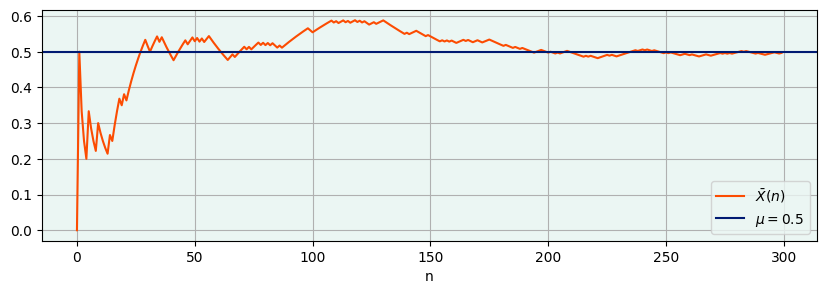

In [3]:
plt.plot(X_i.cumsum()/np.arange(1, n + 1), label = r'$\bar{X}(n)$', color = palette[1])
plt.axhline(np.mean(possible_results), color = palette[0], label = r'$\mu = $' + f'{mu}');
plt.legend();
plt.xlabel("n");

In the plot, we see exactly the kind of behaviour described by the SLLN: as n grows, the sample mean taken from the i.i.d. Random Variables converges to the expected value $\mu = 0.5$ (remember, we simulated a fair coin, that hence lands on head roughly half of the time). This is extremely important, as notice what we are saying: if we are given a sample that is big enough, we are guaranteed to learn something about the Random Variables we are studying, i.e., their expected value. As we are using Random Variables to model the world, this means we can learn something about the world through this procedure. This theorem lies at the centre of Statistical Inference.

When a statistic is used this way (we use it to estimate a parameter of our model), we call it an **Estimator**. By itself, the estimator only gives us a **Point Estimate** of the quantity we are trying to study, that is, our best guess about it. If the estimator is well built, it'll have some nice properties that ensure that our guess will really be the best guess given the information we have. Let's introduce some new notation:

* We'll denote the parameter we want to estimate with $\theta$
* We'll denote the estimator for the parameter $\theta$ with $\hat{\theta}$. This is really a shorthand for $\hat{\theta}(X_1 + X_2 + ... + X_n)$, as, let's not forget this very important fact, estimators are functions of the data.

However, they do not say anything about how certain or uncertain we are about the eatimate. They only give us a single best guess. But in fact, correctly quantifying and communicating uncertainty is one of the main concerns of statistical inference. We want to be able to discern cases where we tossed a coin 10 times and got 4 heads from cases where we tossed it 10000 times and got 4000 heads. While $\hat{\theta}$ for these two cases would be the same, we intuitively understand that they would lead to drastically different conclusions about wheter the coin is fair or not. Hence, we need a way of encoding this uncertainty and manipulating it in our calculations.

In order to do that, the LLN is not enough: it only tells us that we'll learn something as n becomes very, very large. It does not tell us how large it needs to be to get to a certain precision in our estimates - or, in other words, how certain we are about our point estimates given a sample size n. For that, we need another theorem.

### The Central Limit Theorem

Using the setting from the theorem above, we also have:

$$
    X_1 + X_2 + ... + X_n \sim \mathcal{N}(n\mu, n\sigma^2)
$$

as $n \rightarrow \infty$. Technically, what we have in this theorem in a convergence in distribution; Without worrying too much about the technical definitions of types of convergence, what this means is that with a large enough n, we can make approximate probability statements about the sum of Random Variables at hand.

Before looking at how this theorem is useful for statistical inference, we can notice that even just this first results gives us a lot of insight on one possible way normal distributions can arise. Whenever we have an outcome that is the result of a lot of individual random contributions being summed up, we tend to get a Normal distribution as a result. 

Let's check this result with Python. What we can do is:
* simulate a bunch (m = 1000) of samples of length n = 300, from the same random variables
* for each sample, calculate the sum
* analyse the histogram of the sums, and compare it to the Normal Distribution given by the theorem

In [4]:
m = 1000
xs = np.random.choice(possible_results, size = (m, n))

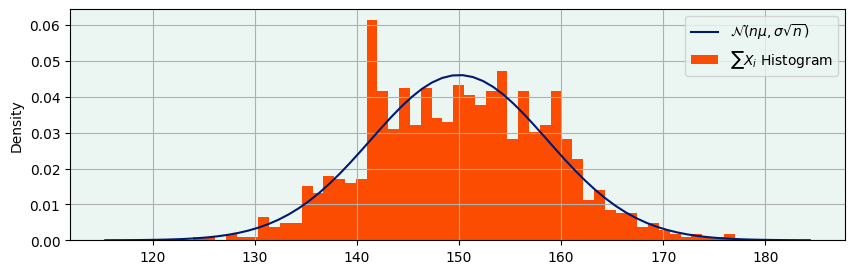

In [5]:
xs_sum = xs.cumsum(axis = 1)
sum_mean = n*mu
sum_sigma = np.sqrt(n)*sigma
rng = np.arange(sum_mean - 4*sum_sigma, sum_mean + 4*sum_sigma)
plt.plot(rng, norm.pdf(rng,sum_mean,sum_sigma), label = r'$\mathcal{N}(n\mu, \sigma\sqrt{n})$')
plt.hist(xs_sum[:, -1], bins = 50, density = True, label = r'$\sum{X_i}$' + " Histogram");
plt.legend()
plt.ylabel("Density");

In the plot, we have the [histogram](https://en.wikipedia.org/wiki/Histogram) of our sample in orange, and the asymptotic distribution given by the CLT - $\mathcal{N}(n\mu, \sigma\sqrt{n})$ - in blue. We see that the histogram matches the distribution that we get from the theorem.

If we go back to our definition of the sample mean, we see that it involves a sum. Can we then use the CLT to infer something about the behaviour of the sample mean as n gets large? We can. By using some basic properties of Random Variables, we get:

$$
    \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt n}} \sim \mathcal{N}(0, 1)
$$

In fact, this one, and not the previous one, is the precise statement of the CLT. Notice that this is exactly what we are after: a probabilistic description of how our random statistic behaves. 

We'll check this, computationally, by considering many different samples (m = 1000) and looking at how their sample mean changes as n grows. This is like imagining many worlds in which the same coin is flipped n times, and look at how the the sample mean we get in each world varies when we grow the sample size n.

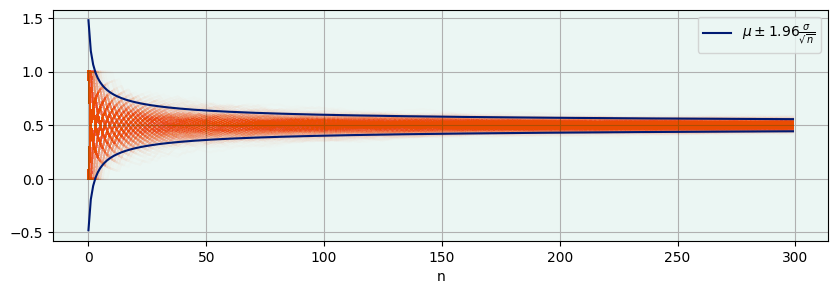

In [6]:
xs_means = xs_sum/(np.arange(1, n + 1).reshape(1, n))
_, ax = plt.subplots()
for i in range(m):
    plt.plot(xs_means[i, :], color = palette[1], alpha = 0.01)
plt.plot(mu + 1.96*sigma/np.sqrt(np.arange(1, n + 1)), color = palette[0], label = r'$\mu \pm 1.96\frac{\sigma}{\sqrt{n}}$');
plt.plot(mu - 1.96*sigma/np.sqrt(np.arange(1, n + 1)), color = palette[0]);
plt.legend();
plt.xlabel("n");

We see that while the sample size grows, the variance of the sample means (i.e., the spread along the y axis, that is how different the sample means are in each different world we are imagining) goes down. This matches our intuition: the bigger the sample, the more certain we will be about our estimate. Finally, we can see the distribution of the sample means for n = 300:

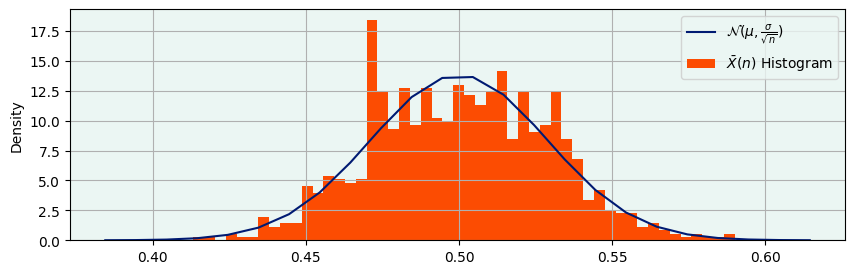

In [7]:
mean_mean = mu
mean_sigma = sigma/np.sqrt(n)
rng = np.arange(mean_mean - 4*mean_sigma, mean_mean + 4*mean_sigma, 0.01)

plt.plot(rng, norm.pdf(rng,mean_mean,mean_sigma), label = r'$\mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$')
plt.hist(xs_means[:, -1], bins = 50, density = True, label = r'$\bar{X}(n)$' + " Histogram");
plt.legend();
plt.ylabel("Density");

Again, in the plot we see the matching between the asymptotic distribution given by the CLT and the histogram of our sample. Think about what distribution is: it is the distribution of the Statistic we are studying, the sample mean. As we said before, a statistic, being a function of random variables, it is a random variable itself. We'll call the distribution of a statistic the **Sampling Distribution**, and its standard deviation the **Standard Error**. 

Let's reflect on what we achieved:

* We discovered that if we have a large enough sample of i.i.d. random variables, the sample mean will be close enough to the expectation of the random variables.
* We also discovered what "close enough" means: the sampling distribution of the sample means is a Normal, centered around the mean mu, and with standard error inversely proportional to the square root of n and directly proportional to the standard deviation of the random variables we are studying.

There is something to be noticed here: the standard error depends on the standard deviation of the random variables we are studying, which is one of the parameters of the probability model of the data that we **don't** know. Hence, what we usually do is estimate the standard error (by using another statistic, the sample variance) in order to estimate the sampling distribution.

The question, now, is how do we use these results for Statistical Inference. The typical situation we found ourselves in is to have a single sample (in our setting, m = 1), and from that we want to learn something about the data generating process. Thanks to the result above, after making some assumptions about the random variables we are studying, we can calculate the theoretical distribution of our statistic. How can we use this to quantify our uncertainty about the point estimates we calculate? In classical statistics, one of the simplest ways we have to do this is through the use of confidence intervals.

## Confidence Intervals

Let's recap where we are: thanks to the Central Limit Theorem, we know we can approximate the sampling distribution of the sample mean with a normal distribution, when the sample is big enough. Somehow, we want to use this ability to quantify our uncertainty around a point estimate. We can proceed as follows (from Wasserman page 94):

* We assume that our statistic, S can be approximated by a Normal Distribution, i.e. $\hat{\theta} \sim \mathcal{N}(\theta, \hat{se})$
* We denote with $\Phi(x) = \mathbb{P}[\mathcal{N}(0, 1) \leq x]$, the cdf of a Normal Random Variable
* Then, we define $z_{\alpha/2} = \Phi^{-1}(1 - (\alpha/2))$, that is, the value such that:
    * $\mathbb{P}[\mathcal{N}(0, 1) \leq z_{\alpha/2}] = 1 - (\alpha/2) \Rightarrow \mathbb{P}[\mathcal{N}(0, 1) > z_{\alpha/2}] = \alpha/2$
    * In words, the probability that a Standard Normal is above $z_{\alpha/2}$ is $\alpha/2$
* This implies that the probability of a Standard Normal of lying between $-z_{\alpha/2}$ and $z_{\alpha/2}$ is $1 - \alpha$
* Which in turn implies that the probability of a Normal with mean $\hat{\theta}$ and standard deviation $\hat{se}$ of lying between $\hat{\theta}-z_{\alpha/2}\hat{se}$ and $\hat{\theta}+z_{\alpha/2}\hat{se}$ is $1 - \alpha$

We call this last interval:

$$
C = (\hat{\theta}-z_{\alpha/2}\hat{se}, \hat{\theta}+z_{\alpha/2}\hat{se})
$$

A confidence interval, and it has has the property that:

$$
\mathbb{P}(\theta \in C) = 1 - \alpha
$$

It might be clear, but this achieves exactly what we wanted: we are quantifying the uncertainty around our estimate. How? That quantification goes in how wide the interval is. Let's look at the formula. We can see that the width of the interval is directly proportional to the Standard Error of the Sampling Distribution of the statistics we are studying, and we know that:
* The standard error is directly proportional to the standard deviation of the data
* The standard error is inversely proportional to the square root of the sample size

This means that bigger sample sizes will result in narrower interval, indicating we have less uncertainty around how estimate, which matches our intuition. 

Let's simulate this. We'll start by writing a function that calculates the confidence interval for the sample mean of a given sample:

In [8]:
def calculate_95ci(X):
    sample_mean = X_i.mean()
    sample_variance = X_i.std()**2
    n = len(X)
    ci = (
        sample_mean - 1.96*np.sqrt(sample_variance/n),
        sample_mean + 1.96*np.sqrt(sample_variance/n)
    )
    return ci

Again, this should make clear that the confidence interval (and the point estimate, for that matters) is a function of the data. Let's go through the function:

* In the first two lines, we calculate the sample mean and variance, and in the third line we store the sample size in a variable, `n`.
* Then, we calculate the ci using the formula that we outlined above. Notice that as $z_{\alpha/2}$ we used 1.96, which is approximately the value for $\alpha = 0.95$ (worth memorising!).


As the data is random, the confidence interval is random. Now, let's simulate a sample of 30 coin tosses and calculate the confidence interval for the sample mean:

In [9]:
n = 30
X_i = np.random.choice(possible_results, size = n)
ci = calculate_95ci(X_i)
print(f"The confidence interval goes from {ci[0]:.2f} to {ci[1]:.2f}")

The confidence interval goes from 0.39 to 0.74


How do we interpret this? We are saying that, with 95% confidence, we believe the expected value of the random variables (that is, in our case, the probability of getting head when tossing the coin) we are analysing lies within this interval. Notice how I did not use the word probability; as we said at the beginning, since we are considering the unknown expected value deterministic, we cannot speak of a probability distribution for it. While this might sound like a total abstract, philosophical controversy, it's actually important and getting the wrong interpretation might lead to gross mistakes in particular situations (which we'll not analyse here, but an example can be found in [1]). How, then, shall we interpret a confidence interval?

### A useful way of interpreting Confidence Intervals

In [1], Wasserman illustrates a very useful way of interpreting confidence intervals. We can say that, if we routinely calculate 95% confidence intervals, these intervals will contain the true parameter we are trying to estimate 95% of the times. In this sense, we can interpret the confidence as a probability: it is enough to keep in mind that is not a probability statement over the parameter, but over the method we are using to estimate it. It needs not to be the same experiment, repeated over and over (which is sometime how you find the confidence interval interpretation explained). We can run different experiment, on different parameters, with different sample sizes, and this property will hold.

Again, we can verify this with Python. We'll simulate running a bunch of experiments (m = 2000) on different coins. Every coin has a different probability of getting head (we encode this information in the variable `mus`), and we throw it a different number of times (we encode this information in the variable `ns`). For each of this, we'll calculate a confidence interval for the sample mean:

In [10]:
m = 2000
cis = []
sample_means = []
mus = 0.5 + ((np.random.normal(size = m)*5).cumsum())/m
ns = np.random.normal(200, 50, size = m).astype(int)
ci_contains_mu = []

for i in range(m):
    n = ns[i]
    mu = mus[i]
    X_i = np.random.choice(possible_results, size = n, p = [1 - mu, mu])
    sample_mean = X_i.mean()
    sample_variance = X_i.std()**2
    ci = (
        sample_mean - 1.96*np.sqrt(sample_variance/n),
        sample_mean + 1.96*np.sqrt(sample_variance/n)
    )
    cis.append(ci)
    ci_contains_mu.append(
        (ci[0] <= .5)&
        (ci[1] >= .5)
    )   
    sample_means.append(sample_mean)

In [11]:
coverage = np.array([
    (cis[i][0] <= mus[i])&
    (cis[i][1] >= mus[i]) 
    for i in range(len(cis))
])
print(f"Our confidence intervals include the true parameter {coverage.mean()*100}% of the time.")

Our confidence intervals include the true parameter 94.35% of the time.


We see that we get exactly what we were expecting.

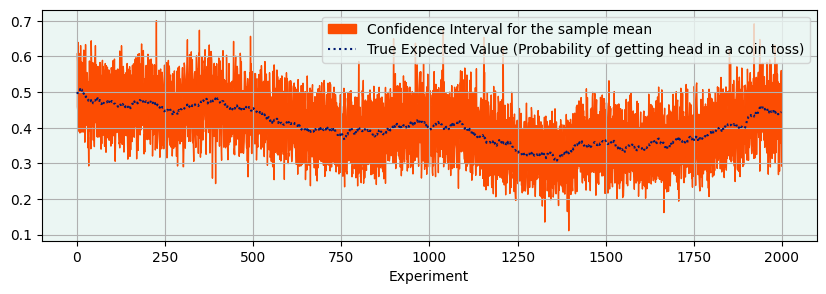

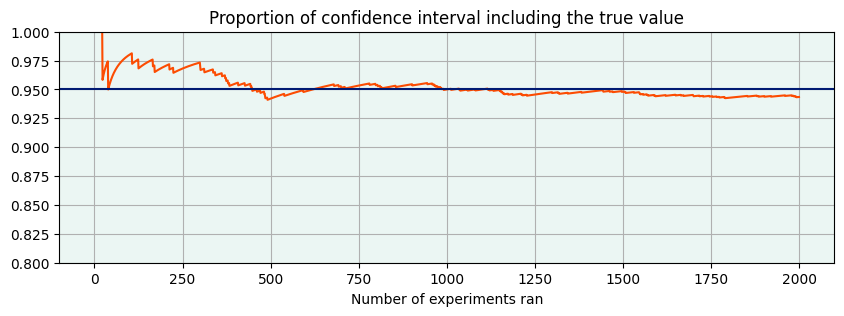

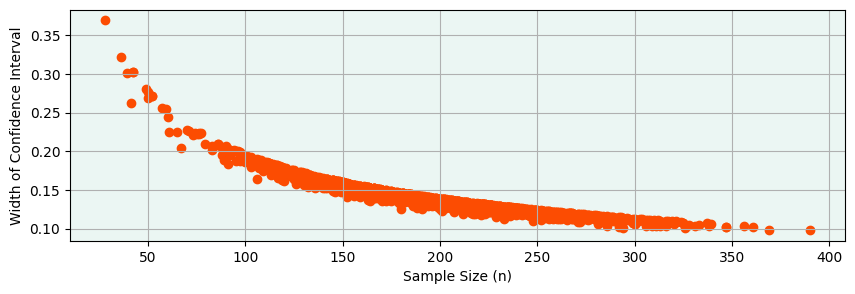

In [12]:
_, ax = plt.subplots()
ax.fill_between(
    np.arange(m),
    [ci[0] for ci in cis],
    [ci[1] for ci in cis],
    color = palette[1],
    label = "Confidence Interval for the sample mean"
)
ax.plot(np.arange(m), mus, linestyle = ":", label = "True Expected Value (Probability of getting head in a coin toss)")
ax.set_xlabel("Experiment")
ax.legend()

coverage = np.array([
    (cis[i][0] <= mus[i])&
    (cis[i][1] >= mus[i]) 
    for i in range(len(cis))
])

_, ax = plt.subplots()
ax.plot(coverage.cumsum()/np.arange(1, m + 1), color = palette[1])
ax.axhline(0.95);
ax.set_ylim(0.8, 1)
ax.set_xlabel("Number of experiments ran")
ax.set_title("Proportion of confidence interval including the true value")

_, ax = plt.subplots()
cis_width = np.array([ci[1] - ci[0] for ci in cis])
ax.scatter(ns, cis_width, color = palette[1]);
ax.set_xlabel("Sample Size (n)")
ax.set_ylabel("Width of Confidence Interval");

Let's analyse the three plots above:

* In the first one, we see plotted the confidence intervals we estimate and the true value for each coin on which we run an experiment. We can see that the vast majority of the times, the intervals include the true value. From this plot it's difficult to ascertain what proportion of the times, but it gives us a good visualisation of the simularion we are running.
%
* In the second plot, we see the proportion of the confidence intervals that include the true value, varying with the number of experiment ran. As the number of experiments grows, this proportion converges towards the value 95%, as expected.
* In the last plot, we see how the confidence interval widths vary with the sample sizes. As we described above, there is an inverse relationship between the two (with the sample size contributing with with its square root). The fact that we do not get an exact relationship here is due to the fact that the width is also influenced by the data standard deviation, which in our case varies with the true parameter $p$.

## References

[1] Wasserman, All of Statistics